In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
df = data.frame

In [4]:
#print(df.head()) study of data set
#df = df.drop(df['AveRooms'].idxmax())
#df = df[df['AveRooms'] <= 20]
print(df.describe())
print(df.info())
print(df.tail())
print(df.shape)
print(df.columns)

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [5]:
print(df['HouseAge'].notnull().sum()) #checking for null
print(df.notnull().sum())
print(df.duplicated().sum())

20640
MedInc         20640
HouseAge       20640
AveRooms       20640
AveBedrms      20640
Population     20640
AveOccup       20640
Latitude       20640
Longitude      20640
MedHouseVal    20640
dtype: int64
0


In [6]:
print(df['AveRooms'].max())
print(df['AveRooms'].min())



141.9090909090909
0.8461538461538461


In [7]:
def capping_outliers(df,cols):
  for col in cols:
    lower = df[col].quantile(0.05)
    upper = df[col].quantile(0.95)

    df[col] = np.where(df[col]<lower,lower,
      np.where(df[col]>upper,upper,df[col]))
    return df

In [8]:
df_numeric = df.select_dtypes(include =[np.number]).columns
df_capped = capping_outliers(df.copy(),df_numeric)
print(df_capped.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.787417     28.639486      5.429000      1.096675   1425.476744   
std        1.562740     12.585558      2.474173      0.473911   1132.462122   
min        1.600570      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max        7.300305     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

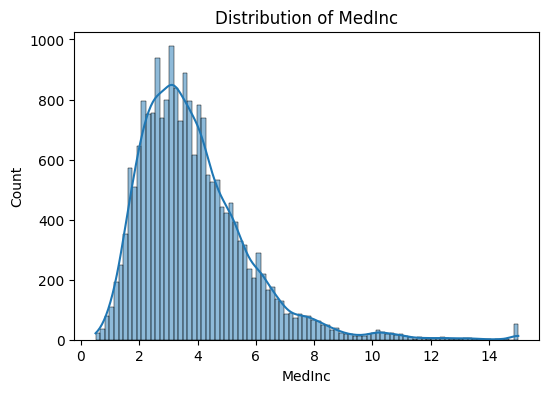

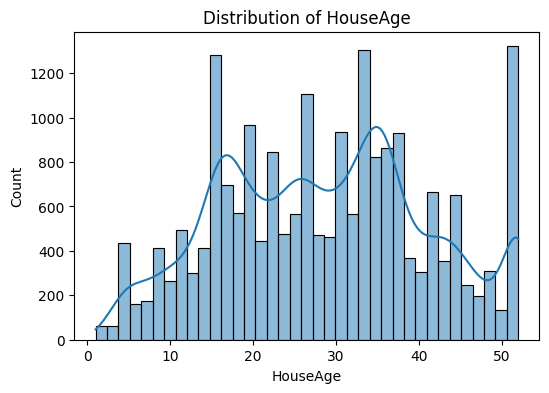

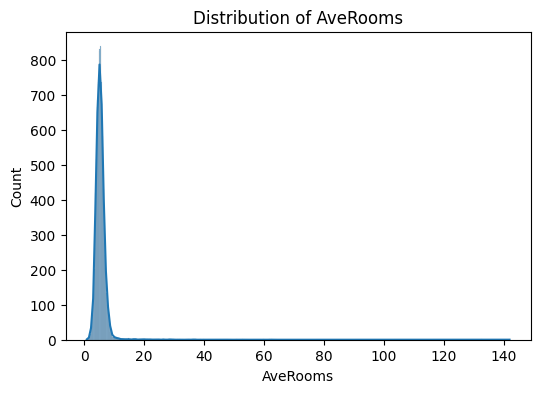

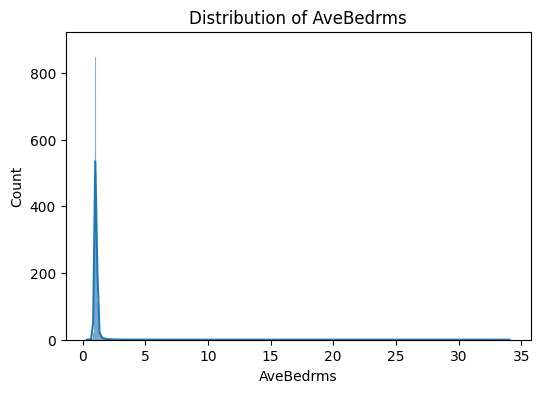

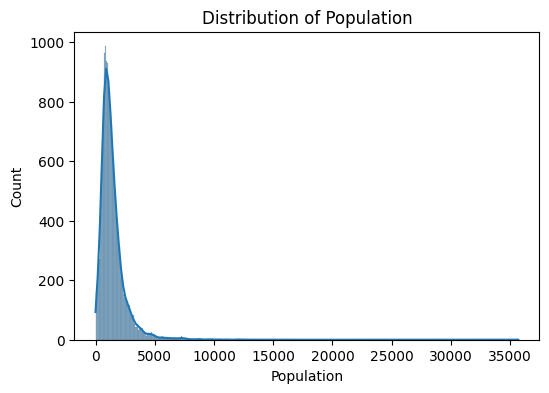

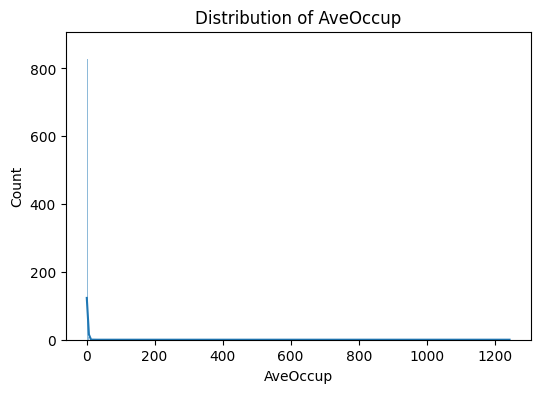

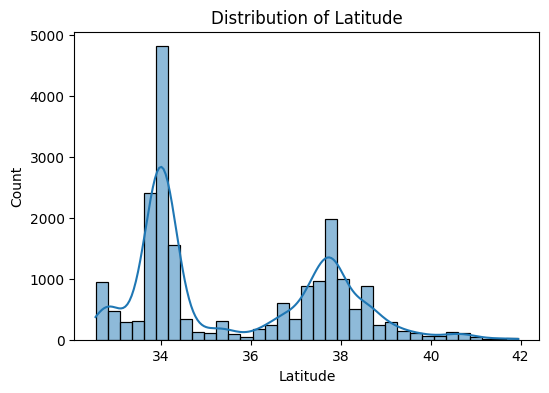

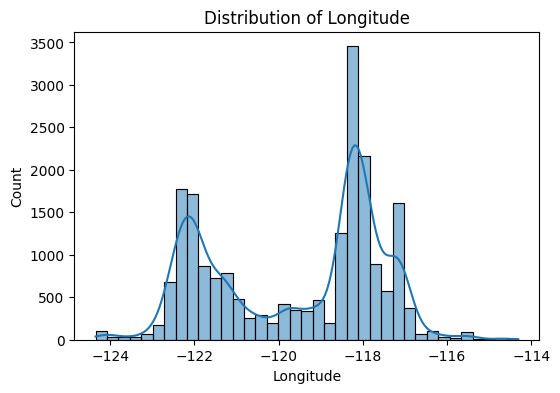

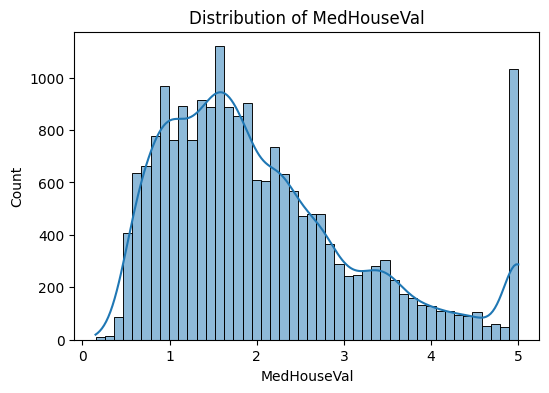

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in df.select_dtypes(include=[np.number]).columns:
  plt.figure(figsize=(6,4))
  sns.histplot(df[col], kde=True)
  plt.title(f"Distribution of {col}")
  plt.show()


In [10]:
# 6. Feature transformations example (log transform skewed features)
skewed_cols = df.select_dtypes(include=[np.number]).skew().sort_values()
print("Skewness before:\n", skewed_cols)


for col in skewed_cols.index:
  if abs(skewed_cols[col]) > 1: # highly skewed
     df[col] = np.log1p(df[col]) # log(1+x) transform






# 7. Feature selection (remove irrelevant/unwanted features)
# Example: drop ID or text columns if present
df = df.drop(['ID'], axis=1, errors='ignore')

Skewness before:
 Longitude      -0.297801
HouseAge        0.060331
Latitude        0.465953
MedHouseVal     0.977763
MedInc          1.646657
Population      4.935858
AveRooms       20.697869
AveBedrms      31.316956
AveOccup       97.639561
dtype: float64


In [13]:
from sklearn.model_selection import train_test_split
x= df.drop("MedHouseVal",axis=1)
y=df['MedHouseVal']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
LR = LinearRegression()
LR.fit(x_train,y_train)
y_predict = LR.predict(x_test)
r2_score = r2_score(y_test,y_predict)
#mean_square = mean_squared_error(y_test,y_predict,squared=False)
rmse = mean_squared_error(y_test, y_predict)
print("R_2 Score:", r2_score)
print("RMSE:",rmse)

R_2 Score: 0.6113824448098928
RMSE: 0.5092479334231448


In [26]:
import pandas as pd

coeff_df = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': LR.coef_
})
print(coeff_df.sort_values(by="Coefficient", ascending=False))


      Feature  Coefficient
0      MedInc     2.297919
3   AveBedrms     1.872264
4  Population     0.015789
1    HouseAge     0.011667
7   Longitude    -0.404147
6    Latitude    -0.405415
2    AveRooms    -0.768486
5    AveOccup    -1.095593
